# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_amount = 1.2
eth_amount = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

# json.dumps to visualize the data more easily
# print(json.dumps(btc_data, indent= 6))
# print(json.dumps(eth_data, indent= 6))

# Extracting current price of each coin from data
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of crypto by multiplying price with amount
btc_value = btc_price * btc_amount
eth_value = eth_price * eth_amount

# Compute total crypto amount
crypto_value = btc_value + eth_value

# Print current crypto balances
print(f"The current value of your {btc_amount} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${eth_value:0.2f}")
print(f"The current value of your crypto wallet is ${crypto_value:0.2f}")

The current value of your 1.2 BTC is $27448.80
The current value of your 5.3 ETH is $8324.82
The current value of your crypto wallet is $35773.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
agg_shares = 200
spy_shares = 110

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp(
    "2023-01-30", 
    tz="America/New_York"
).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_price_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_price_df[stock_price_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = stock_price_df[stock_price_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
stock_price_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
stock_price_df

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2023-01-30 05:00:00+00:00  402.8  405.13  400.28  400.59  74202018   

                                                    AGG                  \
                          trade_count        vwap  open      high   low   
timestamp                                                                 
2023-01-30 05:00:00+00:00      514525  402.226339  99.9  100.0904  99.8   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-01-30 05:00:00+00:00  99.81  6822012       25026  99.892925

In [9]:
# Pick AGG and SPY close prices
agg_close_price = stock_price_df["AGG"]["close"]
spy_close_price = stock_price_df["SPY"]["close"]

# Convert data to float
spy_close_price = float(spy_close_price)
agg_close_price = float(agg_close_price)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.81
Current SPY closing price: $400.59


In [10]:
# Compute the current value of shares
spy_value = spy_shares * spy_close_price
agg_value = agg_shares * agg_close_price
portfolio_value = agg_value + spy_value

# Print current value of shares
print(f"The current value of your {spy_shares} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg_shares} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your portfolio is ${portfolio_value:0.2f}")

The current value of your 110 SPY shares is $44064.90
The current value of your 200 AGG shares is $19962.00
The current value of your portfolio is $64026.90


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_assets = crypto_value + portfolio_value
print(f"Total current value of all financial assets is ${total_assets:.2f}")

# Create savings DataFrame
savings_data = [crypto_value, portfolio_value]
savings_df = pd.DataFrame(
    savings_data,
    columns= ["Amount"],
    index= ["crypto", "stock/bond"] 
)

# Display savings DataFrame
display(savings_df)

Total current value of all financial assets is $99800.52


,Amount
crypto,35773.616
stock/bond,64026.900


<AxesSubplot:title={'center':'Savings Data'}, ylabel='% Amount'>

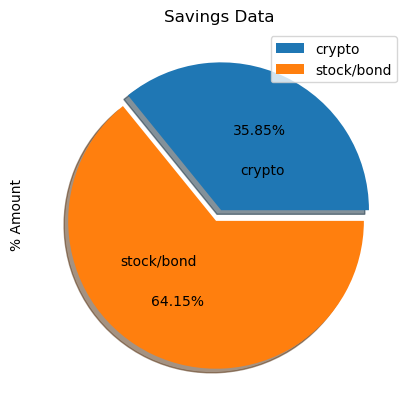

In [12]:
# Plot savings pie chart
explode_data = [.03, .05]
savings_df_plot = savings_df.plot.pie(
    y="Amount", 
    shadow=True, 
    explode=explode_data, 
    labeldistance=.3, 
    title="Savings Data", 
    autopct="%1.2f%%", 
    ylabel="% Amount"
)
savings_df_plot

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
def enough_funds():
    if (total_assets > emergency_fund):
        print(f"Congrats! Your total assets of ${total_assets:.2f} are enough to fun an emergency fund of ${emergency_fund:.2f}")
    elif (total_assets == emergency_fund):
        print(f"Congrats! Your total assets of ${total_assets:.2f} are equal to the amount needed to start an emergency fund")
    elif (total_assets < emergency_fund):
        needed_funds = emergency_fund - total_assets
        print(f"Your assets are almost enough for the amount needed to start an emergency fund, only ${needed_funds:2f} away!!")       

# Validate saving health
enough_funds()

Congrats! Your total assets of $99800.52 are enough to fun an emergency fund of $36000.00


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-30', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
stock_price_5yr_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_price_5yr_df[stock_price_5yr_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = stock_price_5yr_df[stock_price_5yr_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
stock_price_5yr_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
stock_price_5yr_df.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2018-01-30 05:00:00+00:00  282.59  284.736  281.22  281.63  132075557   
2018-01-31 05:00:00+00:00  282.73  283.300  280.68  281.91  118954475   
2018-02-01 05:00:00+00:00  281.08  283.060  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.230  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.850  263.31  264.11  298863447   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-01-30 05:00:00+00:00      427207  282.425628  108.12  108.120  107.92   
2018-01-31 05:00:00+00:00      363005  281.967347  108.20  108.210  107.88   
2018-02-01 05:00:00+00:00      304909  281.766220  107.75  107.825  107.48   
2018-02-02 05:00:00+00:00      548623  277.434737  107.25  107.345  107.10   
2018-02-05 05:00:00+00:00     1178563  269.869953  107.13  107.810  107.00   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-01-30 05:00:00+00:00  108.01   3659538       14454  108.010293  
2018-01-31 05:00:00+00:00  108.10   8066895       29280  108.033072  
2018-02-01 05:00:00+00:00  107.52  10330443       26477  107.695566  
2018-02-02 05:00:00+00:00  107.20   4779312       17781  107.197964  
2018-02-05 05:00:00+00:00  107.63   5991756       26360  107.347994

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_sim = MCSimulation(
    weights=[.6,.4],
    portfolio_data = stock_price_5yr_df,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_stocks_sim.portfolio_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2018-01-30 05:00:00+00:00  282.59  284.736  281.22  281.63  132075557   
2018-01-31 05:00:00+00:00  282.73  283.300  280.68  281.91  118954475   
2018-02-01 05:00:00+00:00  281.08  283.060  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.230  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.850  263.31  264.11  298863447   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-30 05:00:00+00:00      427207  282.425628          NaN  108.12   
2018-01-31 05:00:00+00:00      363005  281.967347     0.000994  108.20   
2018-02-01 05:00:00+00:00      304909  281.766220    -0.000816  107.75   
2018-02-02 05:00:00+00:00      548623  277.434737    -0.021904  107.25   
2018-02-05 05:00:00+00:00     1178563  269.869953    -0.041378  107.13   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-01-30 05:00:00+00:00  108.120  107.92  108.01   3659538       14454   
2018-01-31 05:00:00+00:00  108.210  107.88  108.10   8066895       29280   
2018-02-01 05:00:00+00:00  107.825  107.48  107.52  10330443       26477   
2018-02-02 05:00:00+00:00  107.345  107.10  107.20   4779312       17781   
2018-02-05 05:00:00+00:00  107.810  107.00  107.63   5991756       26360   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-30 05:00:00+00:00  108.010293          NaN  
2018-01-31 05:00:00+00:00  108.033072     0.000833  
2018-02-01 05:00:00+00:00  107.695566    -0.005365  
2018-02-02 05:00:00+00:00  107.197964    -0.002976  
2018-02-05 05:00:00+00:00  107.347994     0.004011

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Omar\Desktop\Module_05\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

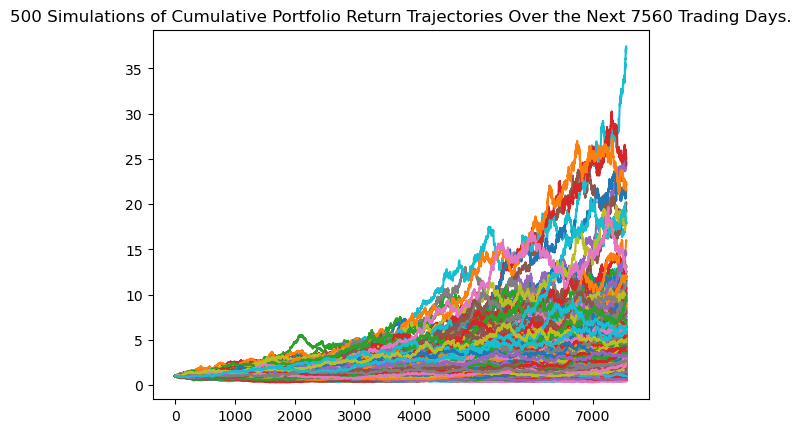

In [37]:
# Plot simulation outcomes
MC_stocks_sim_cumulative_plot = MC_stocks_sim.plot_simulation()
MC_stocks_sim_cumulative_plot

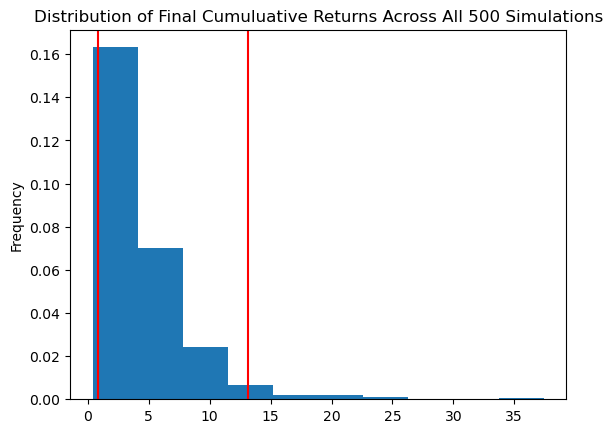

In [38]:
# Plot probability distribution and confidence intervals
MC_stocks_sim_distribution_plot = MC_stocks_sim.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stocks_sim_summary_stats = MC_stocks_sim.summarize_cumulative_return()

# Print summary statistics
print(MC_stocks_sim_summary_stats)

count           500.000000
mean              4.487711
std               3.844873
min               0.400499
25%               2.090372
50%               3.465364
75%               5.407324
max              37.421602
95% CI Lower      0.785833
95% CI Upper     13.134508
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
MC_stocks_sim_ci_lower = round(MC_stocks_sim_summary_stats[8]*initial_investment,2)
MC_stocks_sim_ci_upper = round(MC_stocks_sim_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${MC_stocks_sim_ci_lower} and ${MC_stocks_sim_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $15716.67 and $262690.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [47]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
MC_stocks_sim_ci_lower = round(MC_stocks_sim_summary_stats[8]*initial_investment,2)
MC_stocks_sim_ci_upper = round(MC_stocks_sim_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${MC_stocks_sim_ci_lower} and ${MC_stocks_sim_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $23575.0 and $394035.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


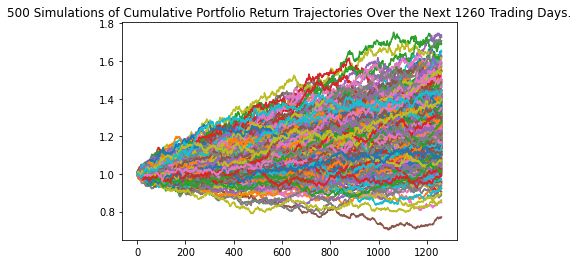

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

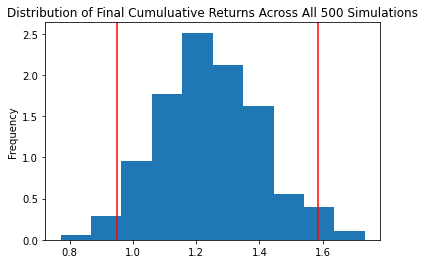

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


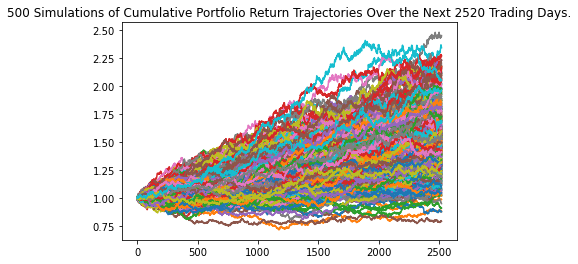

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

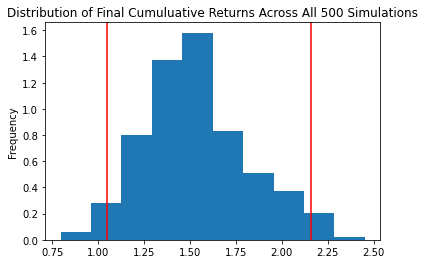

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
